## Load STARE and other packages

In [1]:
import pystare as ps

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy.crs as ccrs
import cartopy.feature as cf

import numpy
import shapely

## Helper functions for plotting and printing

In [2]:
# Some helper functions for plotting & printing.

class figax_container(object):
    def __init__(self,figax):
        self.fig = figax[0]
        self.ax  = figax[1]
        return

def add_coastlines(figax,set_global=False):
    "Add coastlines to the plot."
    ax = figax.ax
    if set_global:
        ax.set_global()
    ax.coastlines()
    return figax

def hello_plot(
        spatial_index_values=None
        ,figax=None
        ,plot_options={'projection':ccrs.PlateCarree(),'transform':ccrs.Geodetic()}
        ,set_global=False
        ,set_coastlines=True
        ,show=True
        ,color=None
        ,lw=1
        ):

    if figax is None:
        figax = figax_container(plt.subplots(1,subplot_kw=plot_options))
        if set_global:
            figax.ax.set_global()
        if set_coastlines:
            figax.ax.coastlines()
    else:
        ax = figax.ax
    
    if spatial_index_values is not None:
        # Calculate vertices and interconnection matrix
        lons,lats,intmat = ps.triangulate_indices(spatial_index_values)
        
        # Make triangulation object & plot
        siv_triang = tri.Triangulation(lons,lats,intmat)
        figax.ax.triplot(siv_triang,c=color,transform=plot_options['transform'],lw=lw)
    
    if show:
        plt.show()
        
    return figax

def hex16(i):
    return "0x%016x"%i

def lonlat_from_coords(coords):
    tmp = numpy.array(coords)
    lat=tmp[:,1]
    lon=tmp[:,0]
    return lon,lat

km  = 1 # Unit of length
deg = 1 # Unit of angle

In [3]:
# Set up the projection and transformation
proj         = ccrs.PlateCarree()
# proj        = ccrs.Robinson() # Drives matplotlib bug.
# proj        = ccrs.Mollweide() # Drives matplotlib bug.
transf       = ccrs.Geodetic()
plot_options = {'projection':proj,'transform':transf}

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = 1.5*default_dpi

## Define the grid to be covered

In [4]:
lon0 =-15
lon1 = 45
nlons = 10

lat0 = 10
lat1 = 60
nlats = 15

In [5]:
lons1 = numpy.linspace(lon0,lon1,nlons)
lats1 = numpy.linspace(lat0,lat1,nlats)

In [6]:
lons, lats = numpy.meshgrid(lons1,lats1)

In [7]:
circumference_lons = numpy.zeros([2*nlons+2*nlats],dtype=numpy.double)
circumference_lats = numpy.zeros([2*nlons+2*nlats],dtype=numpy.double)


In [8]:
j=0
for ilon in range(nlons):
    ilat=0
    circumference_lons[j] = lons[ilat,ilon]
    circumference_lats[j] = lats[ilat,ilon]
    j+=1
    
ilon=nlons-1
for ilat in range(nlats):
    circumference_lons[j] = lons[ilat,ilon]
    circumference_lats[j] = lats[ilat,ilon]
    j+=1
        
for ilon in range(nlons-1,-1,-1):
    ilat=nlats-1
    circumference_lons[j] = lons[ilat,ilon]
    circumference_lats[j] = lats[ilat,ilon]
    j+=1
    
ilon=0
for ilat in range(nlats-1,-1,-1):
    circumference_lons[j] = lons[ilat,ilon]
    circumference_lats[j] = lats[ilat,ilon]
    j+=1
    
circumference_lonlats = numpy.column_stack((circumference_lons,circumference_lats))

## Make a cover from a perimter array of lon-lat pairs

In [9]:
cover_resolution = 6

cover = ps.from_polygon(shapely.geometry.Polygon(circumference_lonlats),resolution=cover_resolution
                                       ,nonconvex=True)

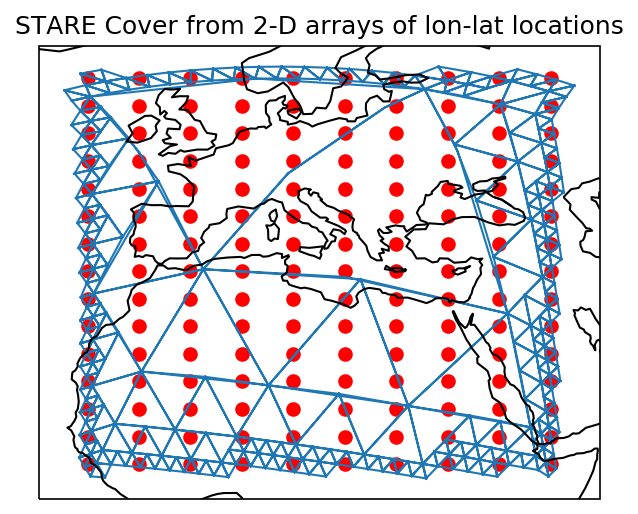

In [10]:
figax = hello_plot(cover,set_coastlines=True,set_global=False,show=False)

figax.ax.scatter(lons,lats,color='r')
figax.ax.set_title('STARE Cover from 2-D arrays of lon-lat locations')

plt.show()

## Use regular grid 1-D lon and lat arrays

In [11]:
circumference_lons[:]=0; circumference_lats[:]=0; j=0

for ilon in range(nlons):
    ilat=0
    circumference_lons[j] = lons1[ilon]
    circumference_lats[j] = lats1[ilat]
    j+=1
    
ilon=nlons-1
for ilat in range(nlats):
    circumference_lons[j] = lons1[ilon]
    circumference_lats[j] = lats1[ilat]
    j+=1
        
for ilon in range(nlons-1,-1,-1):
    ilat=nlats-1
    circumference_lons[j] = lons1[ilon]
    circumference_lats[j] = lats1[ilat]
    j+=1
    
ilon=0
for ilat in range(nlats-1,-1,-1):
    circumference_lons[j] = lons1[ilon]
    circumference_lats[j] = lats1[ilat]
    j+=1
    
circumference_lonlats = numpy.column_stack((circumference_lons,circumference_lats))

In [12]:
cover_resolution = 6

cover = ps.from_polygon(shapely.geometry.Polygon(circumference_lonlats),resolution=cover_resolution
                                       ,nonconvex=True)

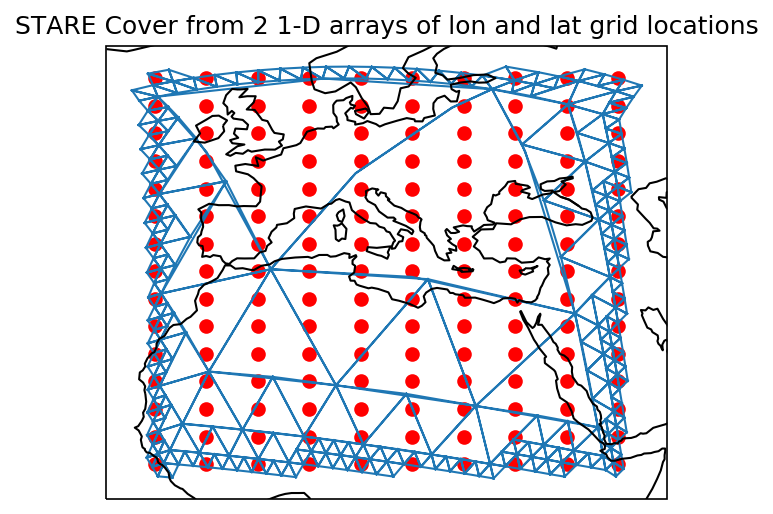

In [13]:
figax = hello_plot(cover,set_coastlines=True,set_global=False,show=False)

figax.ax.scatter(lons,lats,color='r')
figax.ax.set_title('STARE Cover from 2 1-D arrays of lon and lat grid locations')

plt.show()

## Use to_nonconvex_hull_range_from_latlon on perimeter arrays

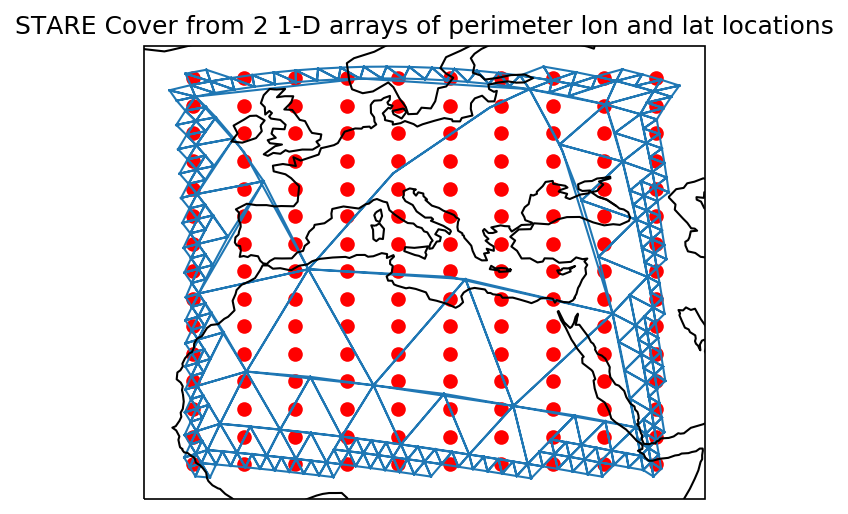

In [14]:
figax = hello_plot(ps.to_nonconvex_hull_range_from_latlon(circumference_lats,circumference_lons,cover_resolution),set_coastlines=True,set_global=False,show=False)

figax.ax.scatter(lons,lats,color='r')
figax.ax.set_title('STARE Cover from 2 1-D arrays of perimeter lon and lat locations')

plt.show()